In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import penaltyblog as pb

In [3]:
data_file = './data/lmf-ac-2021-22.csv'
df = pd.read_csv(data_file, index_col=0)
df.head()

,AMÉ,ATL,ASL,CAZ,GUA,JUÁ,LEÓ,MAZ,MON,NEC,PAC,PUE,QUE,SAN,TIJ,TOL,UNL,UNM
Home \ Away,,,,,,,,,,,,,,,,,,
América,—,0–2,2–3,0–0,0–0,3–0,2–0,2–0,0–0,2–1,1–3,2–0,1–1,2–1,2–0,3–0,1–0,2–0
Atlas,0–1,—,1–0,0–0,1–1,2–0,2–0,1–2,2–1,2–1,0–1,0–1,2–0,2–1,0–2,0–0,1–1,0–0
Atlético San Luis,0–1,2–6,—,0–0,2–2,0–1,2–0,1–0,1–1,0–2,0–2,2–1,1–1,1–3,4–1,0–1,0–3,2–0
Cruz Azul,2–1,1–0,0–1,—,0–1,1–0,0–1,0–2,1–1,1–2,1–1,1–3,2–0,1–2,2–0,4–0,1–1,2–1
Guadalajara,0–0,0–1,1–2,1–1,—,2–2,0–3,3–0,1–3,2–1,1–0,2–3,1–1,1–0,2–1,2–0,1–3,3–1


In [4]:
df.index = df.columns
rows = []
for i in df.index:
    for c in df.columns:
        if i == c: continue
        score = df.loc[i, c]
        if score == '—': continue
        ssplit = score.split('–')
        rows.append([i, c, int(ssplit[0]), int(ssplit[1])])
df = pd.DataFrame(rows, columns = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'])
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG
0,AMÉ,ATL,0,2
1,AMÉ,ASL,2,3
2,AMÉ,CAZ,0,0
3,AMÉ,GUA,0,0
4,AMÉ,JUÁ,3,0


In [5]:
df.dtypes

HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
dtype: object

In [6]:
df.home_score = df['FTHG'].astype('int')
df.away_score = df['FTAG'].astype('int')

In [7]:
df[["FTHG", "FTAG"]].mean()

FTHG    1.271242
FTAG    1.084967
dtype: float64

Text(0.5, 1.0, 'Number of Goals Scored Per Match')

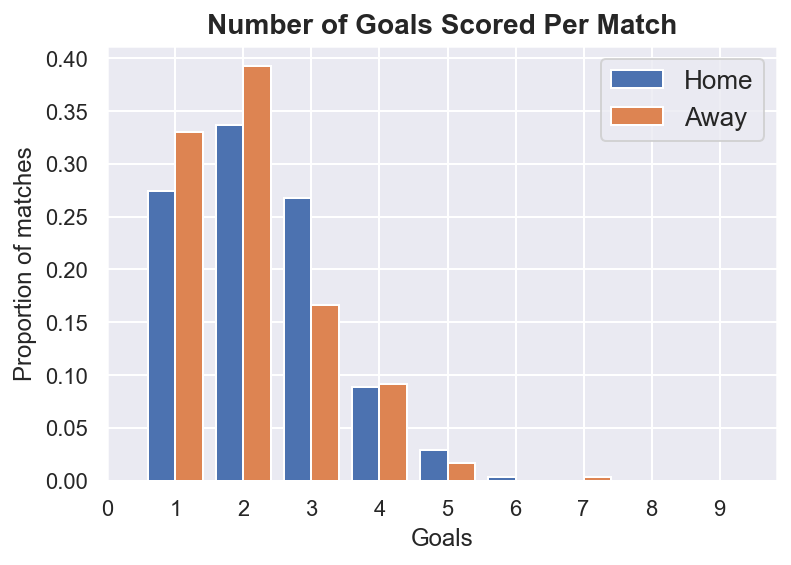

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

max_goals = 10
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
                label=["Home", "Away"], density=True
)
plt.xticks([i - 0.5 for i in range(max_goals)], 
           [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", 
          size=14, fontweight="bold")


Text(0.5, 1.0, 'Number of Goals Scored Per Match')

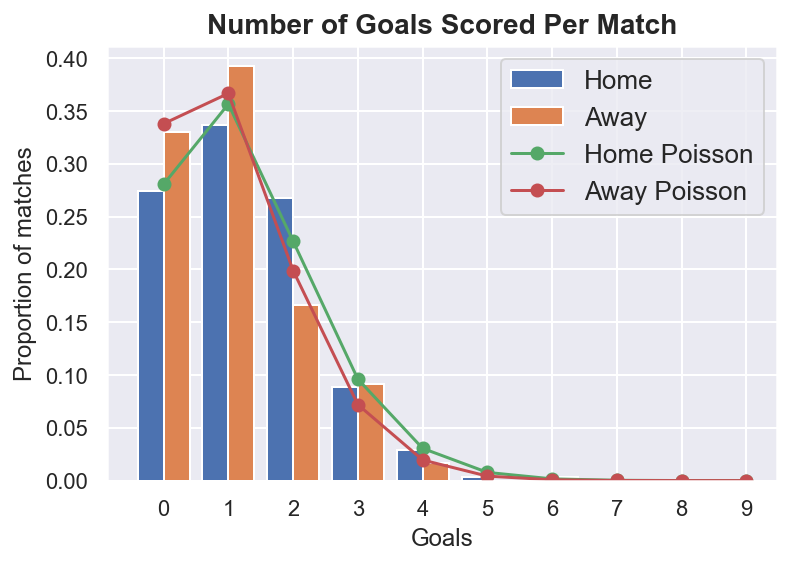

In [14]:
import numpy as np
from scipy.stats import poisson

home_poisson = poisson.pmf(range(10), df["FTHG"].mean())
away_poisson = poisson.pmf(range(10), df["FTAG"].mean())

max_goals = 10
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
    label=["Home", "Away"], density=True
)
plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    home_poisson,
    linestyle="-",
    marker="o",
    label="Home Poisson",
)
plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    away_poisson,
    linestyle="-",
    marker="o",
    label="Away Poisson",
)
plt.xticks([i - 0.5 for i in range(1, max_goals + 1)], 
           [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", size=14, fontweight="bold")